In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

## 1.Получите и загрузите данные.

In [27]:
data_train = pd.read_csv('train.csv')

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2.Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [29]:
data_train = data_train.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [30]:
data_train = data_train.dropna()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [31]:
X = data_train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_train['Survived']
reg = LogisticRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 1.56064198e-04 -1.12705288e+00 -4.39954606e-02 -2.84851567e-01
   2.39113180e-01  3.54137062e-03]]
Bias: [3.24920433]
Error: 0.2913165266106443


## 3.Снова загрузите полные данные.

In [32]:
data_train = pd.read_csv('train.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4.Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [33]:
data_train = data_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


1.PassengerId - <span style="color:red">Удалить</span> - Id пассажира вообще не влияет на выживаемость.\
2.Pclass - <span style="color:green">Оставить</span> - Разный класс был на разных этажах. 1-ый класс был ближе всех к шлюпкам.\
3.Name - <span style="color:red">Удалить</span> - Не влияет на выживание. Возможно известность, но не само имя.\
4.Sex - <span style="color:green">Оставить</span> - Женщин на шлюпки отправляли первыми.\
5.Age - <span style="color:green">Оставить</span> - Детей тоже отправляли первыми. Так же старики, могли быть не в состоянии спастись.\
6.SibSp - <span style="color:green">Оставить</span> - По причине 4 и 5. Человек будет отправлять свою семью вперед себя, что уменьшало шансы на выживание.\
7.Parch - <span style="color:green">Оставить</span> - То же, что и в 6.\
8.Ticket - <span style="color:red">Удалить</span> - Номер билета совершенно не влияет на выживание.\
9.Fare - <span style="color:red">Удалить</span> - Стоимость влиет на класс, а он у нас уже есть.\
10.Cabin - <span style="color:red">Удалить</span> - В зависимости от расположение каюты, человек мог первее попасть на шлюпку. Но в этой колонке очень много пустых значений, а значит смысла от нее не много.\
11.Embarked - <span style="color:red">Удалить</span> - Важно не откуда отплывали, а куда приплыли.

## 5.Проверьте данные на наличие пропущенных значений.

In [34]:
data_train = data_train.dropna()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 39.0+ KB


In [35]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## 6.Категориальные переменные переведите в цифровые значения.

In [36]:
le = LabelEncoder()
le.fit(data_train['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [37]:
data_train['Sex'] = le.transform(data_train['Sex'])
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
885,0,3,0,39.0,0,5
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
889,1,1,1,26.0,0,0


## 7.Проверьте данные на наличие выбросов.

In [38]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

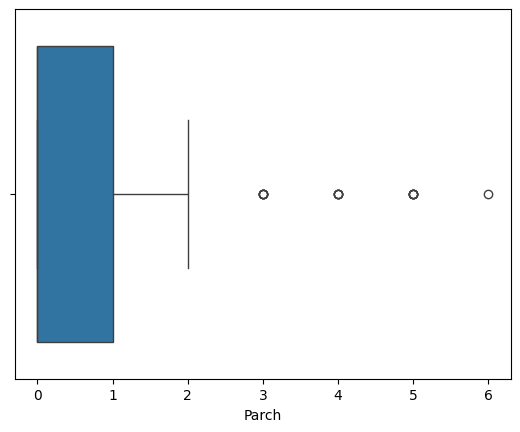

In [39]:
get_boxplot(data_train, ['Parch'])

In [40]:
data_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000


<Axes: >

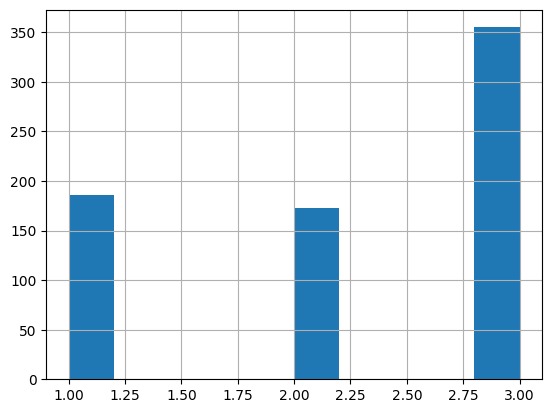

In [41]:
data_train['Pclass'].hist(bins=10)

## 10.Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [42]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 39.0 KB


In [44]:
X2 = data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y2 = data_train['Survived']
reg2 = LogisticRegression().fit(X2, y2)
print('Weights: {}'.format(reg2.coef_))
print('Bias: {}'.format(reg2.intercept_))

pred_values2 = reg2.predict(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])
print('Error: {}'.format(mean_absolute_error(pred_values2, y)))

Weights: [[-1.27317964 -2.50912068 -0.04319932 -0.34707566 -0.02555232]]
Bias: [5.39844244]
Error: 0.18907563025210083


## 11.Сформулируйте выводы по проделанной работе.

In [45]:
print('Error1: {}'.format(mean_absolute_error(pred_values, y)))
print('Error2: {}'.format(mean_absolute_error(pred_values2, y)))

Error1: 0.2913165266106443
Error2: 0.18907563025210083


В данной раюоте были удалены колонки, которые могут путать модель. Так же были удалены пустые значения.
Как мы видим сверху, метрика после преобразования улучшилась и стала намного лучше.
Мое мнение, что можно было бы еще немного провести анализ и заполнить пропуски, а не удалять их. Но даже так, мы получили хорошее улучшение качества